Para este projeto, viso responder às perguntas:

*   Consumidores confiantes sobre o mercado compram mais carros?
*   Quantos carros irão ser comprados em 2025?


Para isso, olharemos para três variáveis: A quantidade de automóveis produzidos em determinado ano, quantidade de vendas de automóveis/ano e o índice de confiança do consumidor (ICC).

# Data Acquisition

Todos os dados foram retirados da Instituto de Pesquisa Econômica Aplicada (Ipea), acessável pelo link: http://www.ipeadata.gov.br/Default.aspx

Os CSVs baixados foram os seguintes:

1.   Vendas de autoveículos no mercado interno
2.   Produção - automóveis - montados - qde.
3.   Índice de confiança do consumidor

Todos foram baixados manualmente. Infelizmente, tive dificuldades em juntar eles por Python, então fiz a junção manualmente, já que todos seguem a mesma estrutura de tempo. Até a entrega do projeto final, irei refazer esta etapa por código.

O arquivo gerado, que será base de todo o código à seguir, está disponível aqui: https://drive.google.com/file/d/1T4C8eWlPsth6u4IlXtaqz1V_583s33VO/view?usp=sharing



# Data Wrangling

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

file_path = '/content/AnaliseVeiculos.csv'
analise_multivariada = pd.read_csv(file_path, sep=';')

# Como os nomes das colunas são grandes, resumo e tiro pontuação:
analise_multivariada.columns = ['Data', 'Producao', 'Vendas', 'ICC']



# Daqui para frente, estamos apenas padronizando/convertendo algumas coisas para evitar problemas futuros:


analise_multivariada['Data'] = pd.to_datetime(analise_multivariada['Data'], format='%Y-%m', errors='coerce')

analise_multivariada['ICC'] = analise_multivariada['ICC'].str.replace(',', '.').astype(float)



# E por último, o ICC não está na mesma escala das outras variáveis, então normalizamos todas as variáveis
scaler = MinMaxScaler()
analise_multivariada[['Producao_Normalizada', 'Vendas_Normalizada', 'ICC_Normalizado']] = scaler.fit_transform(
    analise_multivariada[['Producao', 'Vendas', 'ICC']]
)

num_observacoes = analise_multivariada.shape[0]
print(f"Quantidade de observações: {num_observacoes}")

Quantidade de observações: 365


Com os dados limpos, seguimos para o projeto.

Dicionário de termos:


1.   **Vendas de autoveículos no mercado interno:** Total de vendas de carros no mercado brasileiro por mês. Dados extraídos da Associação Nacional dos Fabricantes de Veículos Automotores, Anuário Estatístico da Indústria Automobilística Brasileira ou Carta Mensal (Anfavea);
2.   **Produção - automóveis - montados - qde.:** Produção de carros no Brasil. Obs.: "Refere-se apenas a carros de passeio / passageiros e de uso misto, não englobando veículos comerciais leves (caminhonetes de uso misto, utilitários e caminhonetes de carga) nem veículos comerciais pesados", também extraído da Anfavea;
3.   **Índice de confiança do consumidor**: "O Índice de confiança do consumidor (ICC) tem como objetivo identificar o sentimento dos consumidores levando em conta suas condições econômicas atuais e a expectativa em relação à sua situação econômica futura. O índice é calculado a partir de um questionário e, em cada pergunta, são computadas as diferenças entre as frequências de respostas positivas e negativas, sendo o índice final a média simples dessas diferenças. Variando de 0 (pessimismo total) a 200 (otimismo total), ele é composto a partir de dados segmentados por nível de renda, sexo e idade. O ICC é composto por outros dois índices: o índice de condições econômicas atuais (ICEA) e o índice de expectativas do consumidor (IEC)". Calculado pela Federação do Comércio do Estado de São Paulo, Pesquisa Conjuntural do Comércio Varejista da Região Metropolitana de São Paulo (Fecomercio SP).


Quantidade de observações (cada uma sendo um mês): 365

# Análise Exploratória

Começamos por identificar as **correlações**. Aqui, conseguimos responder a primeira pergunta de negócio.

In [3]:
correlacao = analise_multivariada[['Producao', 'Vendas', 'ICC']].corr()

print("Matriz de Correlação:")
print(correlacao)

Matriz de Correlação:
          Producao    Vendas       ICC
Producao  1.000000  0.892396  0.659588
Vendas    0.892396  1.000000  0.641574
ICC       0.659588  0.641574  1.000000


Como observado, todas as combinações geram resultados satisfatórios para nossa análise. A venda está fortemente ligada à produção, indicando que as fabricantes de carro fazem pesquisas para produzir a quantidade ideal por ano, evitando excessos. Neste, a correlação é de 0.89.

Também, identificamos que uma parcela importante da motivação dos consumidores é a confiança no mercado. Os consumidores precisam ter indicações que a economia estará estável no futuro antes de comprar um bem deste valor. Neste, a correlação é de 0.64.

Isto responde a primeira pergunta: Consumidores confiantes no mercado têm mais chances de comprar um carro novo.

# Visualização de Dados

Vejamos em um gráfico o histórico dessas variáveis, corroborando a matriz de correlação:

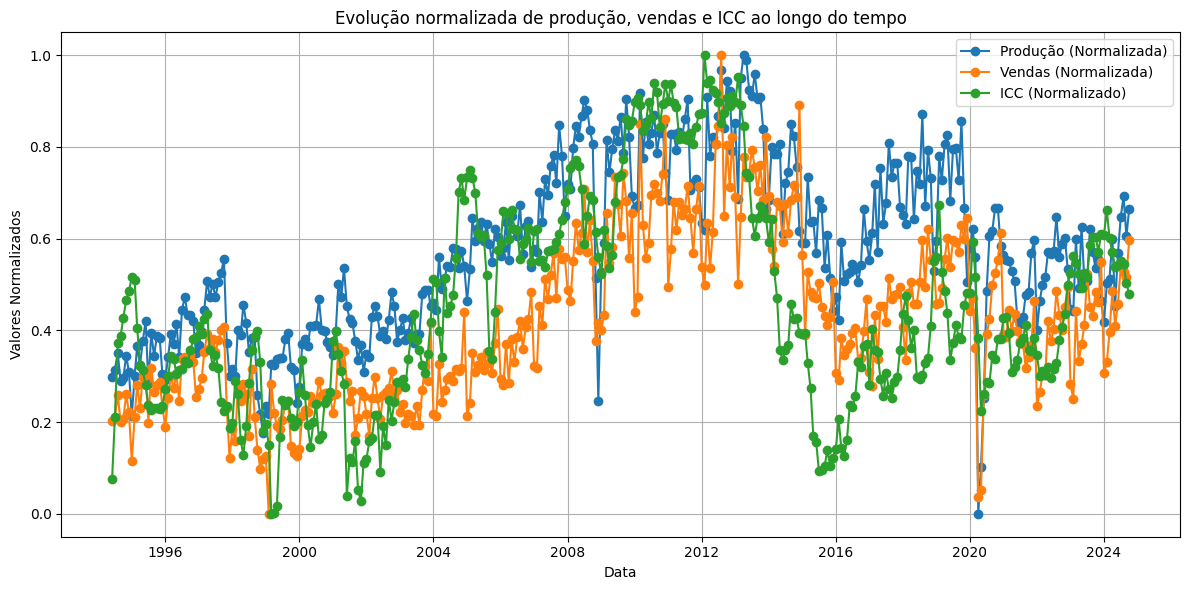

In [4]:
import matplotlib.pyplot as plt

# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(analise_multivariada['Data'], analise_multivariada['Producao_Normalizada'], label='Produção (Normalizada)', marker='o')
plt.plot(analise_multivariada['Data'], analise_multivariada['Vendas_Normalizada'], label='Vendas (Normalizada)', marker='o')
plt.plot(analise_multivariada['Data'], analise_multivariada['ICC_Normalizado'], label='ICC (Normalizado)', marker='o')
plt.title('Evolução normalizada de produção, vendas e ICC ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valores Normalizados')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Claramente, as variáveis percorrem um caminho bastante similar. Porém, pela quantidade de observações e linhas, é difícil seguir uma delas como referência. Por isso, abaixo plotamos as três de forma separada:

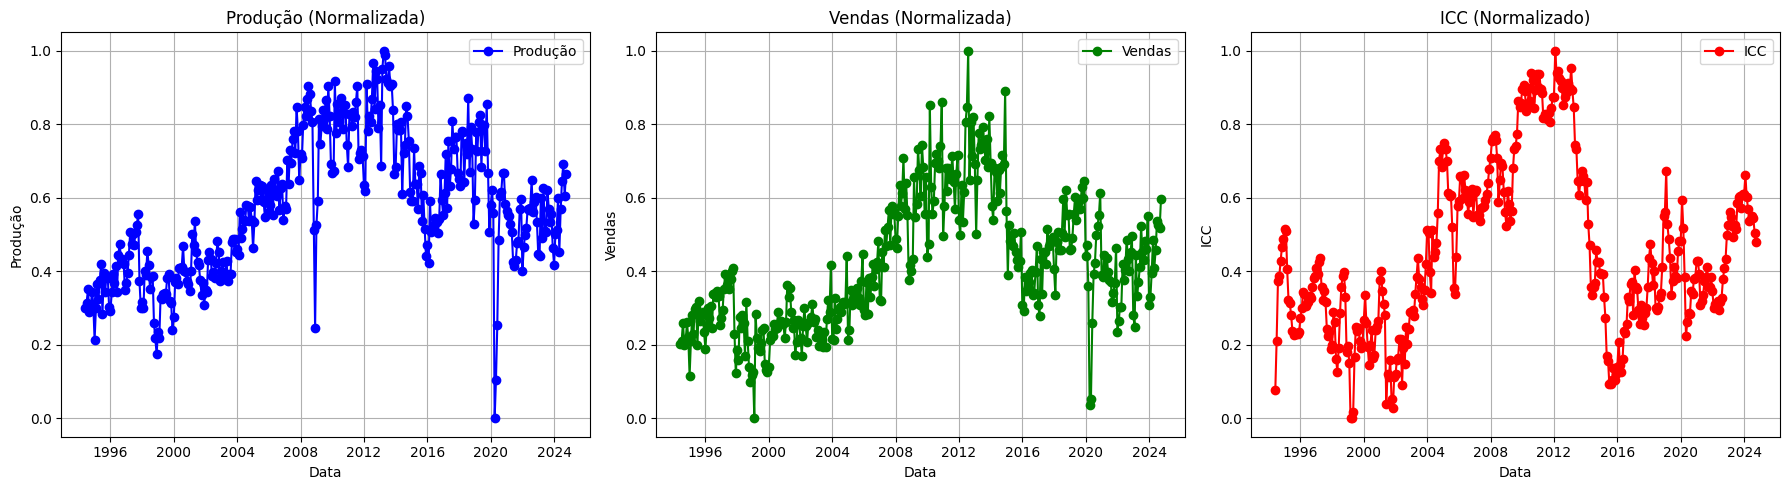

In [5]:
# Para fins de visualização detalhada de cada uma, aqui estão elas plotadas separadamente
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Plotar Produção
axes[0].plot(analise_multivariada['Data'], analise_multivariada['Producao_Normalizada'], label='Produção', color='blue', marker='o')
axes[0].set_title('Produção (Normalizada)')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Produção')
axes[0].grid(True)
axes[0].legend()

# Plotar Vendas
axes[1].plot(analise_multivariada['Data'], analise_multivariada['Vendas_Normalizada'], label='Vendas', color='green', marker='o')
axes[1].set_title('Vendas (Normalizada)')
axes[1].set_xlabel('Data')
axes[1].set_ylabel('Vendas')
axes[1].grid(True)
axes[1].legend()

# Plotar ICC
axes[2].plot(analise_multivariada['Data'], analise_multivariada['ICC_Normalizado'], label='ICC', color='red', marker='o')
axes[2].set_title('ICC (Normalizado)')
axes[2].set_xlabel('Data')
axes[2].set_ylabel('ICC')
axes[2].grid(True)
axes[2].legend()


plt.tight_layout()
plt.show()

Finalmente, chegamos a conclusão de que os dados estão em condições de serem usados em um modelo preditivo.

# Teste e avaliação de vários modelos

In [6]:
!pip install boruta

from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
import numpy as np

# Selecionar as variáveis independentes (X) e a variável dependente (y)
X = analise_multivariada[['Producao', 'Vendas', 'ICC']]
y = analise_multivariada['Vendas']

# Modelo base do Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Criar o seletor Boruta
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42)

# Ajustar o Boruta ao conjunto de dados
boruta_selector.fit(X.values, y.values)

# Resultados do Boruta
print("Aceitadas:")
for i, col in enumerate(X.columns):
    if boruta_selector.support_[i]:
        print(col)

print("\nRejeitadas:")
for i, col in enumerate(X.columns):
    if not boruta_selector.support_[i]:
        print(col)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.4 MB/s eta 0:00:00
Aceitadas:
Vendas

Rejeitadas:
Producao
ICC


O BORUTA recomendou rejeitar duas das três variáveis. Como esse projeto é baseado em usar uma variável para tentar prever a outra, continuei fazendo testes para garantir que essa seria a melhor ideia.

Como a variável Produção está muito relacionada com a Venda, e geralmente a venda influencia a produção (e não o contrário), experimentei por deixar ela de lado e ver pelo Random Forest Regressor se isso aumenta a acurácia do modelo.

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_todas = analise_multivariada[['Producao', 'Vendas', 'ICC']]  #Vamos testar com todas as variáveis
X_sem_producao = analise_multivariada[['Vendas', 'ICC']]  #Variáveis sem Producao
y = analise_multivariada['Vendas']

X_train_todas, X_test_todas, y_train, y_test = train_test_split(X_todas, y, test_size=0.3, random_state=42)
X_train_sem_producao, X_test_sem_producao, _, _ = train_test_split(X_sem_producao, y, test_size=0.3, random_state=42)

# Todas as variáveis
rf_todas = RandomForestRegressor(n_estimators=100, random_state=42)
rf_todas.fit(X_train_todas, y_train)

# Previsões com todas as variáveis
y_pred_todas = rf_todas.predict(X_test_todas)

# Modelo sem Producao
rf_sem_producao = RandomForestRegressor(n_estimators=100, random_state=42)
rf_sem_producao.fit(X_train_sem_producao, y_train)

# Previsões sem Producao
y_pred_sem_producao = rf_sem_producao.predict(X_test_sem_producao)

# Avaliação de desempenho
mse_todas = mean_squared_error(y_test, y_pred_todas)
r2_todas = r2_score(y_test, y_pred_todas)

mse_sem_producao = mean_squared_error(y_test, y_pred_sem_producao)
r2_sem_producao = r2_score(y_test, y_pred_sem_producao)



print("Desempenho com todas as variáveis:")
print(f"- Mean Squared Error (MSE): {mse_todas:.4f}")
print(f"- R² Score: {r2_todas:.4f}")

print("\nDesempenho sem Producao:")
print(f"- Mean Squared Error (MSE): {mse_sem_producao:.4f}")
print(f"- R² Score: {r2_sem_producao:.4f}")

Desempenho com todas as variáveis:
- Mean Squared Error (MSE): 6284470.0979
- R² Score: 0.9978

Desempenho sem Producao:
- Mean Squared Error (MSE): 3333224.6039
- R² Score: 0.9988


A remoção da variável produção impacta positivamente o modelo. Como podemos ver, o Erro Quadrático Médio (MSE em inglês) reduz quando retiramos ele. Também, R² melhorou levemente.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Os três algoritmos a testar, conforme instruções
modelos = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Regressão Linear": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

# Avaliação do desempenho
def avaliar_modelo(modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Divisão dos dados
X_train_vendas_icc, X_test_vendas_icc, y_train, y_test = train_test_split(
    X_sem_producao, y, test_size=0.3, random_state=42
)

# Avaliar os modelos e salvar os resultados
resultados_mse = {}
resultados_r2 = {}
for nome, modelo in modelos.items():
    mse, r2 = avaliar_modelo(modelo, X_train_vendas_icc, X_test_vendas_icc, y_train, y_test)
    resultados_mse[nome] = mse
    resultados_r2[nome] = r2


print("\nResultados - Mean Squared Error (MSE):")
for nome, mse in resultados_mse.items():
    print(f"{nome}: {mse:.4f}")

print("\nResultados - R² Score:")
for nome, r2 in resultados_r2.items():
    print(f"{nome}: {r2:.4f}")



Resultados - Mean Squared Error (MSE):
Random Forest: 3333224.6039
Regressão Linear: 0.0000
Gradient Boosting: 2172813.3933

Resultados - R² Score:
Random Forest: 0.9988
Regressão Linear: 1.0000
Gradient Boosting: 0.9992


Após feedback inicial, decidi incorporar a sugestão de testar alguns modelos. Da lista, Prophet e Holt-Winters. Aqui estão eles:

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjc9ojcz1/nufdu8xa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjc9ojcz1/3u_pdtyh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90697', 'data', 'file=/tmp/tmpjc9ojcz1/nufdu8xa.json', 'init=/tmp/tmpjc9ojcz1/3u_pdtyh.json', 'output', 'file=/tmp/tmpjc9ojcz1/prophet_modelxzyw4a9b/prophet_model-20250117015637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:56:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:56:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

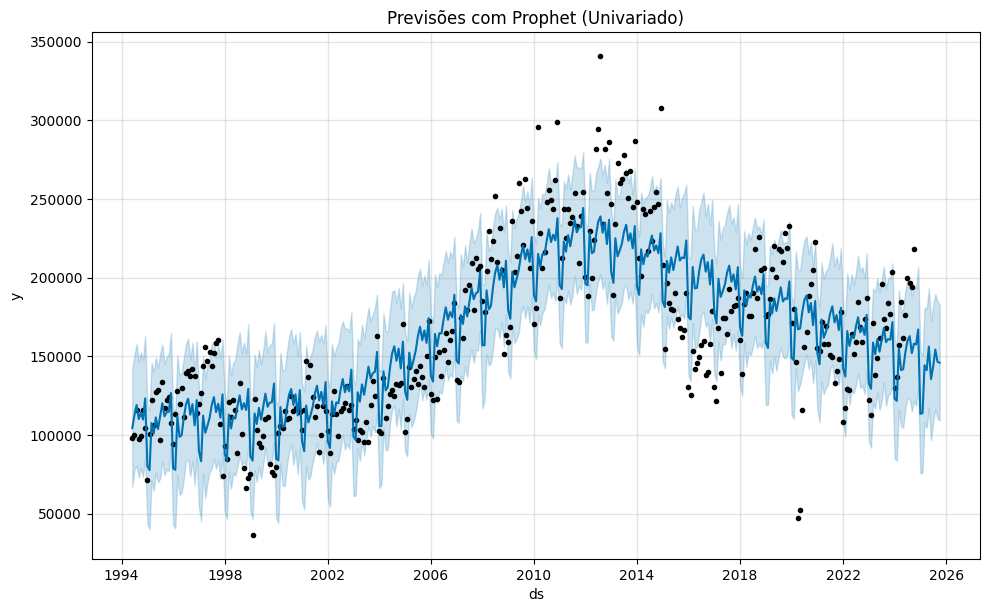

Prophet - Mean Squared Error (MSE): 1559051005.3906


In [22]:
!pip install prophet

from prophet import Prophet

# Usando apenas tempo e venda
df_prophet = analise_multivariada[['Data', 'Vendas']].rename(columns={
    'Data': 'ds', 'Vendas': 'y'
})

prophet_model = Prophet()

prophet_model.fit(df_prophet)

# Prevendo um ano
future = prophet_model.make_future_dataframe(periods=12, freq='M')

forecast = prophet_model.predict(future)

# Plotando previsões
fig = prophet_model.plot(forecast)
plt.title('Previsões com Prophet (Univariado)')
plt.show()

# Verificando os resultados
y_true = analise_multivariada['Vendas'][-12:] # Comparando com os dados reais
y_pred = forecast['yhat'][-12:]  # Previsões
mse_prophet = mean_squared_error(y_true, y_pred)
print(f"Prophet - Mean Squared Error (MSE): {mse_prophet:.4f}")


Claramente fora de questão. Fazendo alterações e lendo mais sobre o Prophet, decidi usar a variável produção como regressora. Aqui está:

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjc9ojcz1/78xhfhuv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjc9ojcz1/4cgb95gc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39896', 'data', 'file=/tmp/tmpjc9ojcz1/78xhfhuv.json', 'init=/tmp/tmpjc9ojcz1/4cgb95gc.json', 'output', 'file=/tmp/tmpjc9ojcz1/prophet_model76gasnj_/prophet_model-20250117015931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

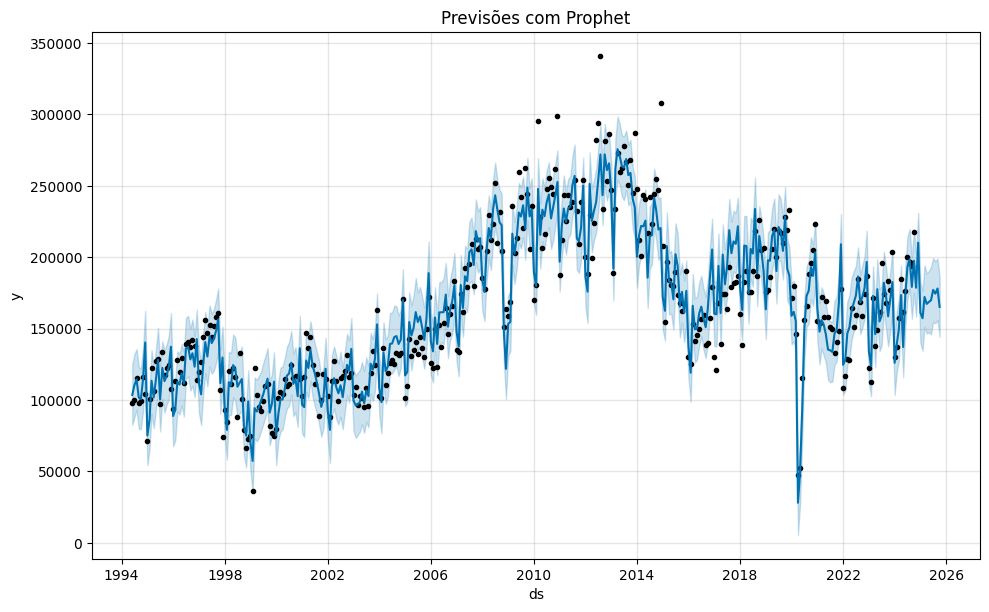

Prophet - Mean Squared Error (MSE): 506927766.5697


In [23]:
from prophet import Prophet

# Agora incluíndo a produção:
df_prophet = analise_multivariada[['Data', 'Vendas', 'Producao']].rename(columns={
    'Data': 'ds', 'Vendas': 'y', 'Producao': 'add_producao'
})

prophet_model = Prophet()
prophet_model.add_regressor('add_producao')

prophet_model.fit(df_prophet)

# Prevendo um ano
future = prophet_model.make_future_dataframe(periods=12, freq='M')
future = future.merge(df_prophet[['ds', 'add_producao']], on='ds', how='left')

# Para os períodos futuros, usar a média de 'Producao'
mean_producao = df_prophet['add_producao'].mean()
future['add_producao'].fillna(mean_producao, inplace=True)

# Prevendo
forecast = prophet_model.predict(future)

# Plotando previsões
fig = prophet_model.plot(forecast)
plt.title('Previsões com Prophet')
plt.show()

# Verificando se melhorou
y_true = analise_multivariada['Vendas'][-12:]
y_pred = forecast['yhat'][-12:]
mse_prophet = mean_squared_error(y_true, y_pred)
print(f"Prophet - Mean Squared Error (MSE): {mse_prophet:.4f}")

Pequenos ajustes nos hiperparâmetros na esperança de melhorar o modelo:

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjc9ojcz1/sn12jdo1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjc9ojcz1/tvszw3pi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64732', 'data', 'file=/tmp/tmpjc9ojcz1/sn12jdo1.json', 'init=/tmp/tmpjc9ojcz1/tvszw3pi.json', 'output', 'file=/tmp/tmpjc9ojcz1/prophet_modelr9fjqgw_/prophet_model-20250117015936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:59:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:59:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

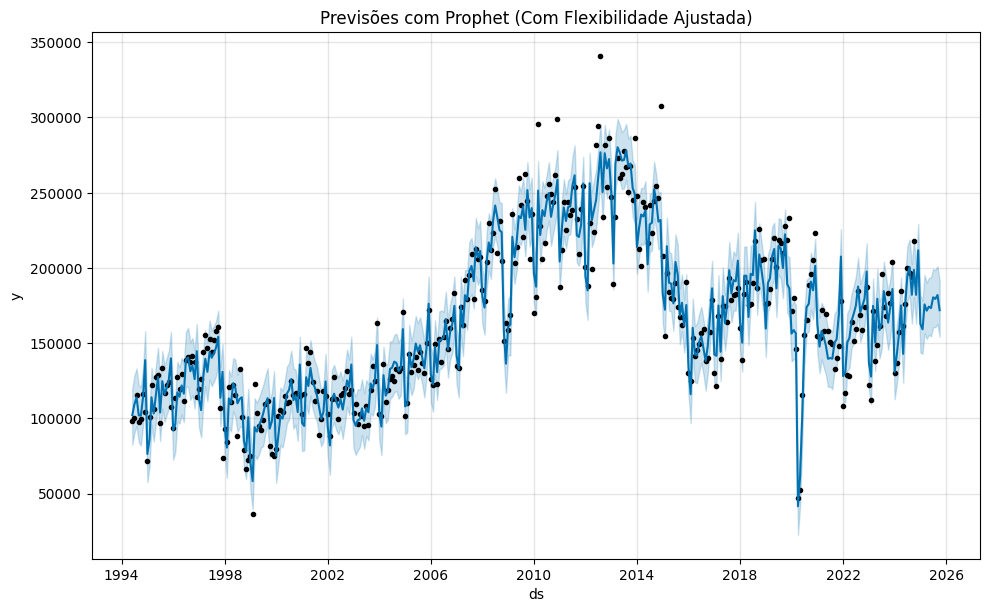

Prophet - Mean Squared Error (MSE): 439820182.6323


In [24]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Agora incluíndo a produção:
df_prophet = analise_multivariada[['Data', 'Vendas', 'Producao']].rename(columns={
    'Data': 'ds', 'Vendas': 'y', 'Producao': 'add_producao'
})

# Dando maior flexibilidade ao modeloe
prophet_model = Prophet(changepoint_prior_scale=0.5)
prophet_model.add_regressor('add_producao')

prophet_model.fit(df_prophet)

# Prevendo um ano
future = prophet_model.make_future_dataframe(periods=12, freq='M')
future = future.merge(df_prophet[['ds', 'add_producao']], on='ds', how='left')

# Para os períodos futuros, usar a média de 'Producao'
mean_producao = df_prophet['add_producao'].mean()
future['add_producao'].fillna(mean_producao, inplace=True)

# Prevendo
forecast = prophet_model.predict(future)

# Plotando previsões
fig = prophet_model.plot(forecast)
plt.title('Previsões com Prophet (Com Flexibilidade Ajustada)')
plt.show()

# Verificando se melhorou
y_true = analise_multivariada['Vendas'][-12:]
y_pred = forecast['yhat'][-12:]
mse_prophet = mean_squared_error(y_true, y_pred)
print(f"Prophet - Mean Squared Error (MSE): {mse_prophet:.4f}")


Tendo este um MSE - Erro Quadrático Médio - relativamente alto. Partimos então para o Holt-Winters:

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Holt-Winters - Mean Squared Error (MSE): 187249646.0980


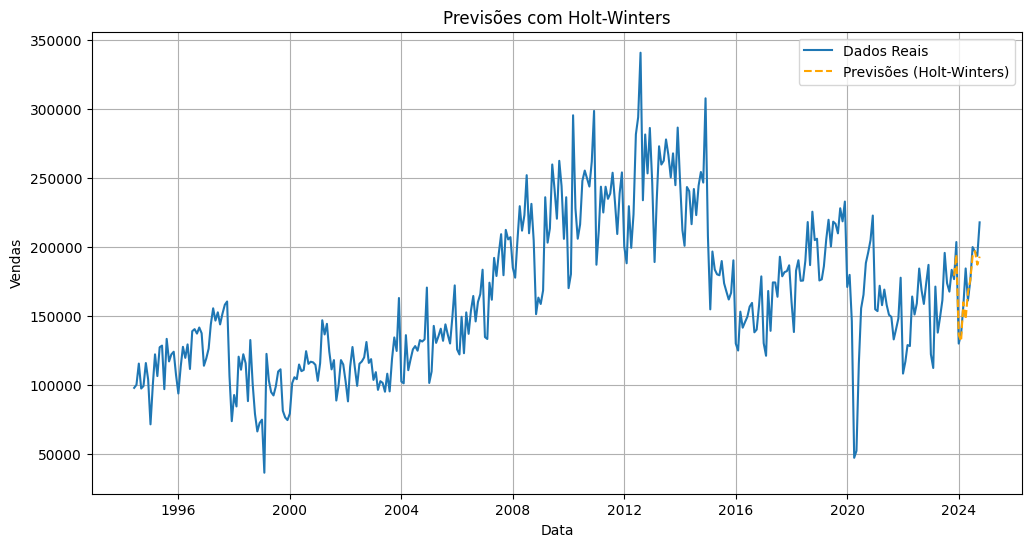

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np

# Dividindo os dados em treino e teste
train_hw = analise_multivariada['Vendas'][:-12]
test_hw = analise_multivariada['Vendas'][-12:]

# Ajustando o modelo e passando alguns hiperparâmetros
hw_model = ExponentialSmoothing(
    train_hw,
    seasonal='add',
    seasonal_periods=12,
    trend='add'
).fit()

# Fazer previsões
hw_forecast = hw_model.forecast(steps=12)

# Avaliando desempenho
mse_hw = mean_squared_error(test_hw, hw_forecast)
print(f"Holt-Winters - Mean Squared Error (MSE): {mse_hw:.4f}")

# Plotar previsões
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(analise_multivariada['Data'], analise_multivariada['Vendas'], label='Dados Reais')
plt.plot(analise_multivariada['Data'][-12:], hw_forecast, label='Previsões (Holt-Winters)', linestyle='--', color='orange')
plt.title('Previsões com Holt-Winters')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.grid()
plt.show()


De longe, o menor erro de todos os modelos que consideram bem o tempo. Para isso, simplificamos o modelo, já que ele usa apenas uma variável para fazer a previsão: vendas. Neste exemplo, ele preveu muito bem as vendas de um ano. E de dois anos?

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Holt-Winters - Mean Squared Error (MSE) nos últimos 24 meses: 172776988.8914


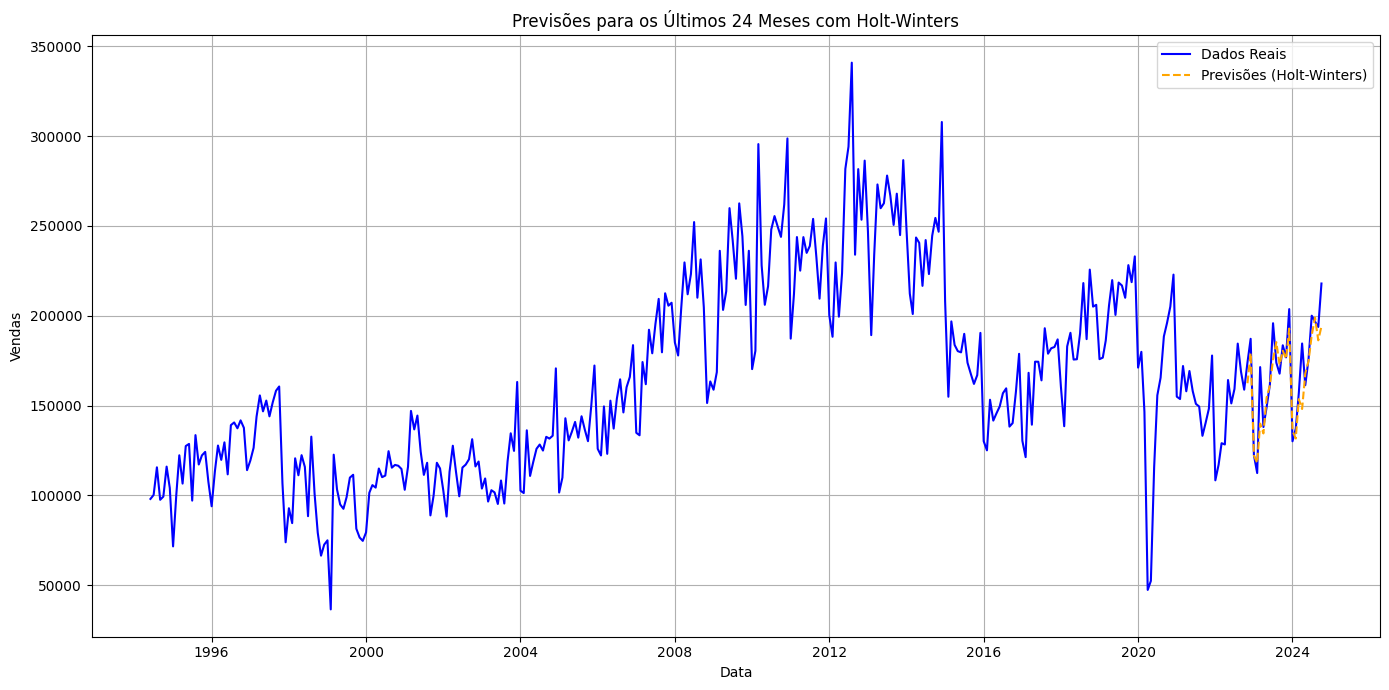

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Dividindo os dados em treino e teste, agora com dois anos
train_hw = analise_multivariada['Vendas'][:-24]
test_hw = analise_multivariada['Vendas'][-24:]

# Ajustando o modelo e passando alguns hiperparâmetros
hw_model = ExponentialSmoothing(
    train_hw,
    seasonal='add',
    seasonal_periods=12,
    trend='add'
).fit()

# Testando
hw_forecast = hw_model.forecast(steps=24)

# Avaliando o desempenho
mse_hw = mean_squared_error(test_hw, hw_forecast)
print(f"Holt-Winters - Mean Squared Error (MSE) nos últimos 24 meses: {mse_hw:.4f}")

# Adicionando as datas correspondentes aos últimos 24 meses
test_dates = analise_multivariada['Data'][-24:]

# Plotar previsões
plt.figure(figsize=(14, 7))
plt.plot(analise_multivariada['Data'], analise_multivariada['Vendas'], label='Dados Reais', color='blue')
plt.plot(test_dates, hw_forecast, label='Previsões (Holt-Winters)', linestyle='--', color='orange')
plt.title('Previsões para os Últimos 24 Meses com Holt-Winters')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Um ótimo desempenho. Mas como otimizar o modelo? Vamos utilizar o grid search:

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dividindo os dados em treino e teste, agora com dois anos
train_hw = analise_multivariada['Vendas'][:-24]
test_hw = analise_multivariada['Vendas'][-24:]

# Grid search para hiperparâmetros
melhor_mse = float('inf')
melhores_parametros = {}
melhor_forecast = None

# Testar diferentes combinações
trend_options = ['add', 'mul', None]  # Tendência aditiva, multiplicativa ou nenhuma
seasonal_options = ['add', 'mul', None]  # Sazonalidade aditiva, multiplicativa ou nenhuma
damping_options = [None, 0.8, 0.9]  # VAmortecimento

# Esse comentário é só um easter egg mesmo, pra dizer que vamos passar por um loop que nem na montanha russa agora:

for trend in trend_options:
    for seasonal in seasonal_options:
        for damping in damping_options:
            try:
                print(f"Testando trend={trend}, seasonal={seasonal}, damping={damping}")

                # Ajustar o modelo
                hw_model = ExponentialSmoothing(
                    train_hw,
                    seasonal=seasonal,
                    seasonal_periods=12,
                    trend=trend,
                    damped_trend=damping
                ).fit()

                # Prevendo 24 meses
                hw_forecast = hw_model.forecast(steps=24)

                # Avaliando o desempenho
                mse_hw = mean_squared_error(test_hw, hw_forecast)

                # Atualizando o melhor modelo, se necessário
                if mse_hw < melhor_mse:
                    melhor_mse = mse_hw
                    melhores_parametros = {'trend': trend, 'seasonal': seasonal, 'damping': damping}
                    melhor_forecast = hw_forecast

            except Exception as e:
                print(f"Eita, erro ao ajustar o modelo com trend={trend}, seasonal={seasonal}, damping={damping}: {e}")

# Exibindo os melhores parâmetros e desempenho
print("\nMelhores parâmetros encontrados:")
print(melhores_parametros)
print(f"Melhor MSE: {melhor_mse:.4f}")

Testando trend=add, seasonal=add, damping=None


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Testando trend=add, seasonal=add, damping=0.8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Testando trend=add, seasonal=add, damping=0.9


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Testando trend=add, seasonal=mul, damping=None
Testando trend=add, seasonal=mul, damping=0.8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Testando trend=add, seasonal=mul, damping=0.9
Testando trend=add, seasonal=None, damping=None
Testando trend=add, seasonal=None, damping=0.8
Testando trend=add, seasonal=None, damping=0.9


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Testando trend=mul, seasonal=add, damping=None


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Testando trend=mul, seasonal=add, damping=0.8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Testando trend=mul, seasonal=add, damping=0.9


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Testando trend=mul, seasonal=mul, damping=None


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Testando trend=mul, seasonal=mul, damping=0.8


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Testando trend=mul, seasonal=mul, damping=0.9


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Testando trend=mul, seasonal=None, damping=None
Testando trend=mul, seasonal=None, damping=0.8
Testando trend=mul, seasonal=None, damping=0.9
Testando trend=None, seasonal=add, damping=None
Testando trend=None, seasonal=add, damping=0.8
Eita, erro ao ajustar o modelo com trend=None, seasonal=add, damping=0.8: Can only dampen the trend component
Testando trend=None, seasonal=add, damping=0.9
Eita, erro ao ajustar o modelo com trend=None, seasonal=add, damping=0.9: Can only dampen the trend component
Testando trend=None, seasonal=mul, damping=None
Testando trend=None, seasonal=mul, damping=0.8
Eita, erro ao ajustar o modelo com trend=None, seasonal=mul, damping=0.8: Can only dampen the trend component
Testando trend=None, seasonal=mul, damping=0.9
Eita, erro ao ajustar o modelo com trend=None, seasonal=mul, damping=0.9: Can only dampen the trend component
Testando trend=None, seasonal=None, damping=None
Testando trend=None, seasonal=None, damping=0.8
Eita, erro ao ajustar o modelo com tr

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Implementando no código limpo:

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Melhor Modelo - Mean Squared Error (MSE): 162878024.0467


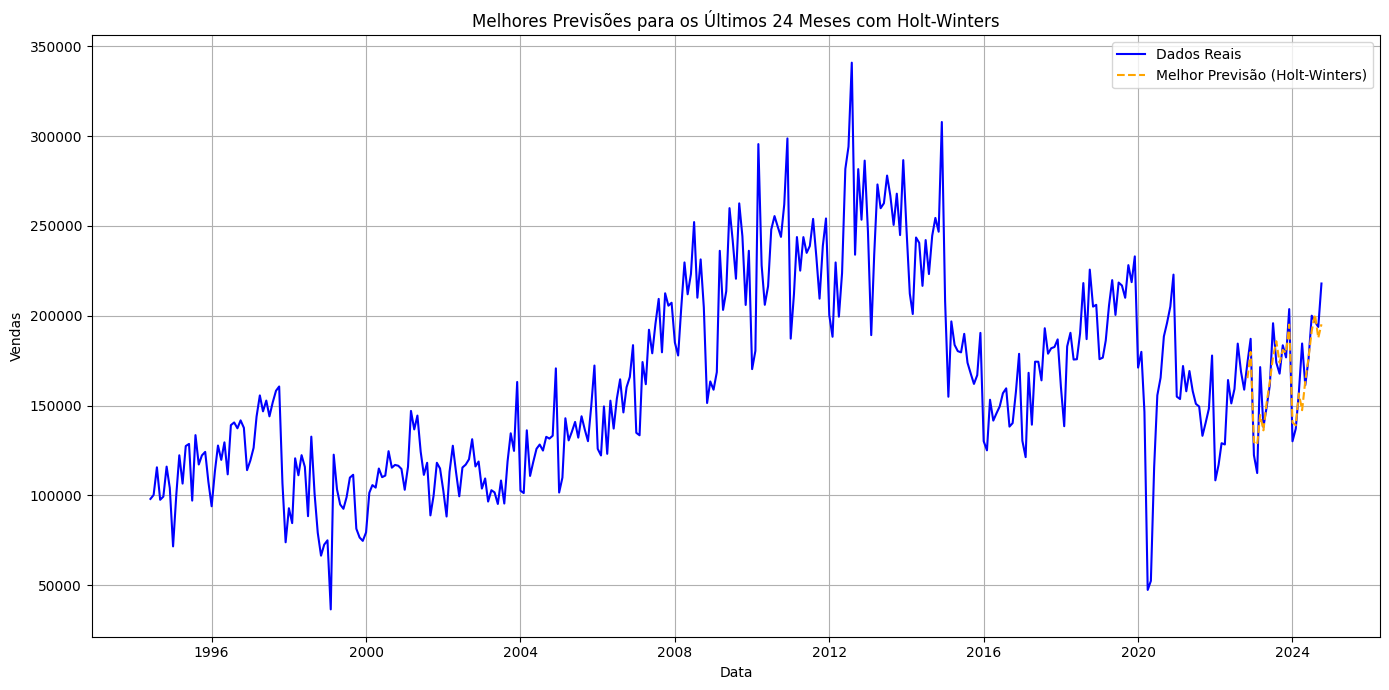

In [30]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Dividindo os dados em treino e teste, agora com dois anos
train_hw = analise_multivariada['Vendas'][:-24]
test_hw = analise_multivariada['Vendas'][-24:]

# Ajustando o modelo com os melhores parâmetros encontrados
melhor_modelo = ExponentialSmoothing(
    train_hw,
    seasonal='mul',
    seasonal_periods=12,
    trend='add',
    damped_trend=None
).fit()

# Testando
melhor_forecast = melhor_modelo.forecast(steps=24)

# Avaliando o desempenho
mse_melhor = mean_squared_error(test_hw, melhor_forecast)
print(f"Melhor Modelo - Mean Squared Error (MSE): {mse_melhor:.4f}")

# Adicionando as datas correspondentes aos últimos 24 meses
test_dates = analise_multivariada['Data'][-24:]

# Plotar previsões
plt.figure(figsize=(14, 7))
plt.plot(analise_multivariada['Data'], analise_multivariada['Vendas'], label='Dados Reais', color='blue')
plt.plot(test_dates, melhor_forecast, label='Melhor Previsão (Holt-Winters)', linestyle='--', color='orange')
plt.title('Melhores Previsões para os Últimos 24 Meses com Holt-Winters')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Voilà!

# Gráfico comparativo do desempenho dos modelos

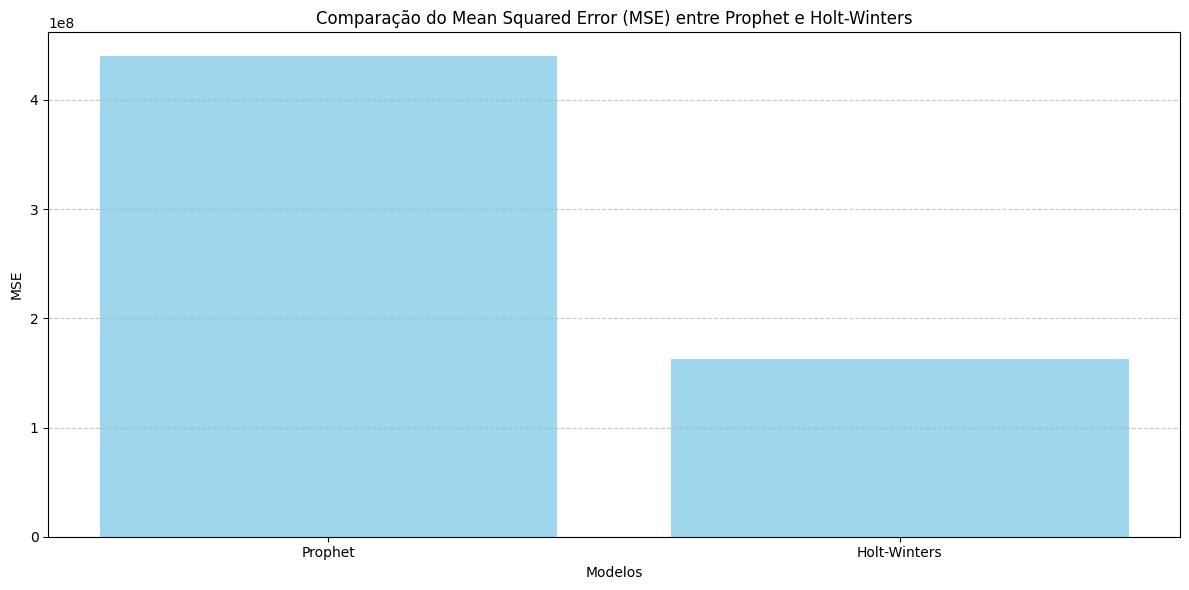

In [31]:
import matplotlib.pyplot as plt

# Passando os dados diretamente
resultados_mse_filtrados = {
    'Prophet': 439820182.6323,
    'Holt-Winters': 162878024.0467
}

# Gráfico para MSE
plt.figure(figsize=(12, 6))
plt.bar(resultados_mse_filtrados.keys(), resultados_mse_filtrados.values(), color="skyblue", alpha=0.8)
plt.title("Comparação do Mean Squared Error (MSE) entre Prophet e Holt-Winters")
plt.xlabel("Modelos")
plt.ylabel("MSE ou Erro Quadrático Médio")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()




Decidi por comparar apenas esses dois modelos. Isso porque eles sim levam em consideração sazonalidade, sendo o Holt-Winters univariado e fortemente ligado ao tempo. Escolhi comparar o MSE porque como queremos prever, é importante prever bem.
Acurácia é o que preciso para uma previsão de um valor futuro.

#Conclusão e avaliação das métricas

Como percebemos pelos gráficos e cálculos, o Holt-Winters segue invencível como melhor modelo. A métrica principal usada para tomar essa conclusão é o Erro Quadrático Médio, já que quero fazer uma previsão e isso necessita de acurácia.